In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

***Using Social Factors to Predict Student Academic Performance in Portugal***

**Introduction**

It is difficult to interpret the true meaning of student grades because there are numerous outside factors that impact academic performance. We suspect that non-academic factors play a big role in predicting grades. Through research, we came to understand the impact of socioeconomic backgrounds in student achievements because countries with highly tracked systems tend to show stronger relationships. For example, people who come from a wealthy background are much more likely to “buy” educational success for their children whereas poor families struggle in this aspect. In addition to that, we actually discovered that Portugal’s education system actually has some of the more stronger socioeconomic background effects but their material and cultural resources have proven to reduce these effects drastically by 45%. Statistics show that “there is empirical evidence that income and wealth are related to student achievement and other educational outcomes” and therefore, things like the education level of the parents and the quality of family relationships have a big impact. In this project, these are three (quality of family relationships and the education level of the mother and father) of the six predictors we have selected to give our attention to.

It goes without saying that all student interactions play a role in their educational achievements. In one of the articles we came across, we saw a general breakdown of a model with four levels to illustrate the most personal to the most externalized elements of a person’s life experience. The students personal experiences are portrayed as the microsystem which consists of factors such as student resiliency, individual student abilities in terms of cognitivity, along with health and attendance (motivational, physical, and affective factors). Secondly, the meso-system factors look at interactive experiences between students which consist of school environments, parent training, peer culture and achievement. Lastly, the exo- and macro-systems (larger community and climate/culture respeively) are depicted together which focus primarily on the societal and systemic factors that affect student learning. This refers to the students lifestyle which has several influences like how much a student goes out with friends, their romantic relationships, and the amount of free time available to students after school (the last three of our six predictors).

In particular, our project will look at the predictive power of social factors on academic performance. We roughly define a social factor as something that could affect someone's lifestyle or relationships. For this project, we have selected the Student Performance Dataset from the UC Irvine Machine Learning Repository, which outlines student achievements in secondary education of two Portugeuse schools. Through school reports and questionnaires, over 30 attributes were collected ranging from grades, demographic, social and school related aspects. From the two datasets provided for evaluating student performance based on subjects (Portugeuse language and Math), we have selected math as our area of interest. Our goal in this project is to select social factors and evaluate their impact on the students grade in Math, and to determine which ones are most predictive of student grades. It is difficult to interpret the true meaning of student grades because there are numerous outside factors that could impact academic performance. We suspect that non-academic factors play a big role in predicting grades. 

**Methods and Results**

The first step in our data analysis is to load the dataset from the internet. We save this as a dataframe called data_raw:

In [7]:
# download zip file containing student-mat.csv 
#
url <-"https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

temp <- tempfile()
temp2 <- tempfile()

download.file(url, temp)
unzip(zipfile = temp, exdir = temp2)

# read csv file containing student academic performance
data_raw <- read_csv2(file.path(temp2, "student-mat.csv"))
unlink(c(temp, temp2))

data_raw %>% slice(1:10)



Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


Table 1. Summary of student data collected from two Portugese secondary schools. The potential predictors include the columns from school - absences while potential
target variables include the columns from G1 - G3

Since we are interested in investigating the predictive power of **social** factors, we decided to include the following variables in our exploratory data analysis:
1. famsize - family size,

2. Pstatus - parental marital status

3. goout - going out frequency

4. romantic - whether the student was in a romantic relationship

5. freetime - the amount of free time a student had

6. Medu - mother's level of education

7. Fedu - father's level of education

8. paid - whether the student recieved paid tutoring

9. famsup - percieved level of family support

10. famrel - percieved quality of family relationships

In addition, we decided to choose G3 - overall grade for the school year, as our target variable. We select these relevant columns from data_raw and save them in a dataframe called data_select_predictors:



In [66]:
# select columns corresponding to overall grades and the 10 predictors we have decided to use
data_select_predictors <- data_raw %>%
    select(famsize, Pstatus, Medu, goout, romantic, freetime, Fedu, paid, famsup, famrel, G3)

We noticed that the data in G3 is numerical, ranging from 0 - 20. Since we would like to perform a k nearest neighbor classification analysis, we need to convert this data into categorical form. Based on the Portugese secondary school grading system (source: https://en.wikipedia.org/wiki/Academic_grading_in_Portugal), we converted numerical grades into the following grade classifications: poor, weak, sufficient, good, very good, and excellent. 

These changes are reflected in a dataframe called grade_cats

In [67]:
# convert grades from numerical to categorical data according to the Portugese academic grading system found here:
#https://en.wikipedia.org/wiki/Academic_grading_in_Portugal
grade_cats <- data_select_predictors %>%
    mutate(grade_category = cut(G3, br = c(-1,3.4,9.4,13.4,15.4,17.4,20), labels = c("poor", "weak", "sufficient", "good", "very good",
                                                                                             "excellent"))) %>%
    mutate(romantic_categorized = ifelse(romantic == "yes", 1, 0))

To begin our data analysis, we split the grade_cats into training and testing datasets. We decided to use a 75/25 split between training and testing data as that
provides a good balance between accurate modeling and accurate evaluation.

In [68]:
# split data into training and testing data
set.seed(1)
grades_split <- initial_split(grade_cats, prop = 0.75, strata = grade_category)
grades_train <- training(grades_split)
grades_test <- testing(grades_split)

To get an idea of how the grade categories are distributed, we create a plot of student grade distributions: 

`summarise()` ungrouping output (override with `.groups` argument)



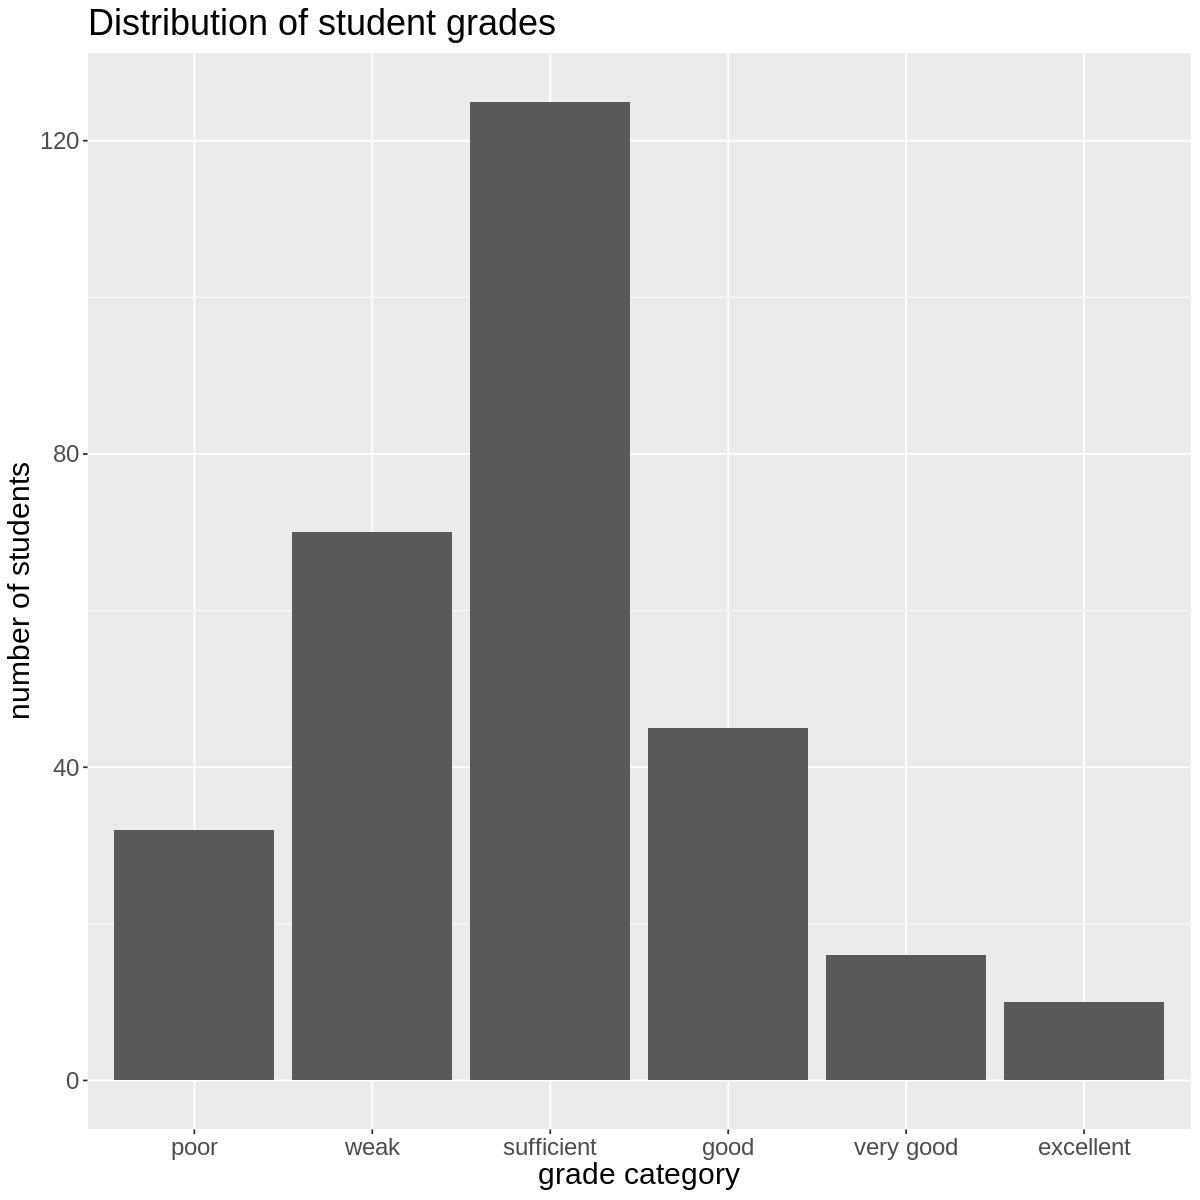

In [69]:
# Table showing distribution of each category of grade in the training dataset
grades_summary <- grades_train %>%
    group_by(grade_category) %>%
    summarize(n = n())

grades_summary_plot <- grades_summary %>%
    ggplot(aes(x = grade_category, y = n)) +
    geom_bar(stat = "identity") +
    labs(x = "grade category", y = "number of students") +
    ggtitle("Distribution of student grades") +
    theme(text = element_text(size = 18)) +
    scale_fill_brewer(palette = 'Set1')
grades_summary_plot

Figure 1. Bar graph showing the student grades distribution.

Looking at Figure 1, the vast majority of students fall under the "sufficient" grade category. In fact, "sufficeint" students outnumber "excellent" students by over a
factor of ten. Because of this class imbalance, the k nearest neighbors algorithm would be much more likely to classify a grade observation as "sufficient". To balance
the classes, we need to perform upsampling when creating our recipe. 

To get an idea of how our potential predictors affect student grades, we plot stacked bar graphs showing the breakdown of predictor categories that make up each
grade category. 

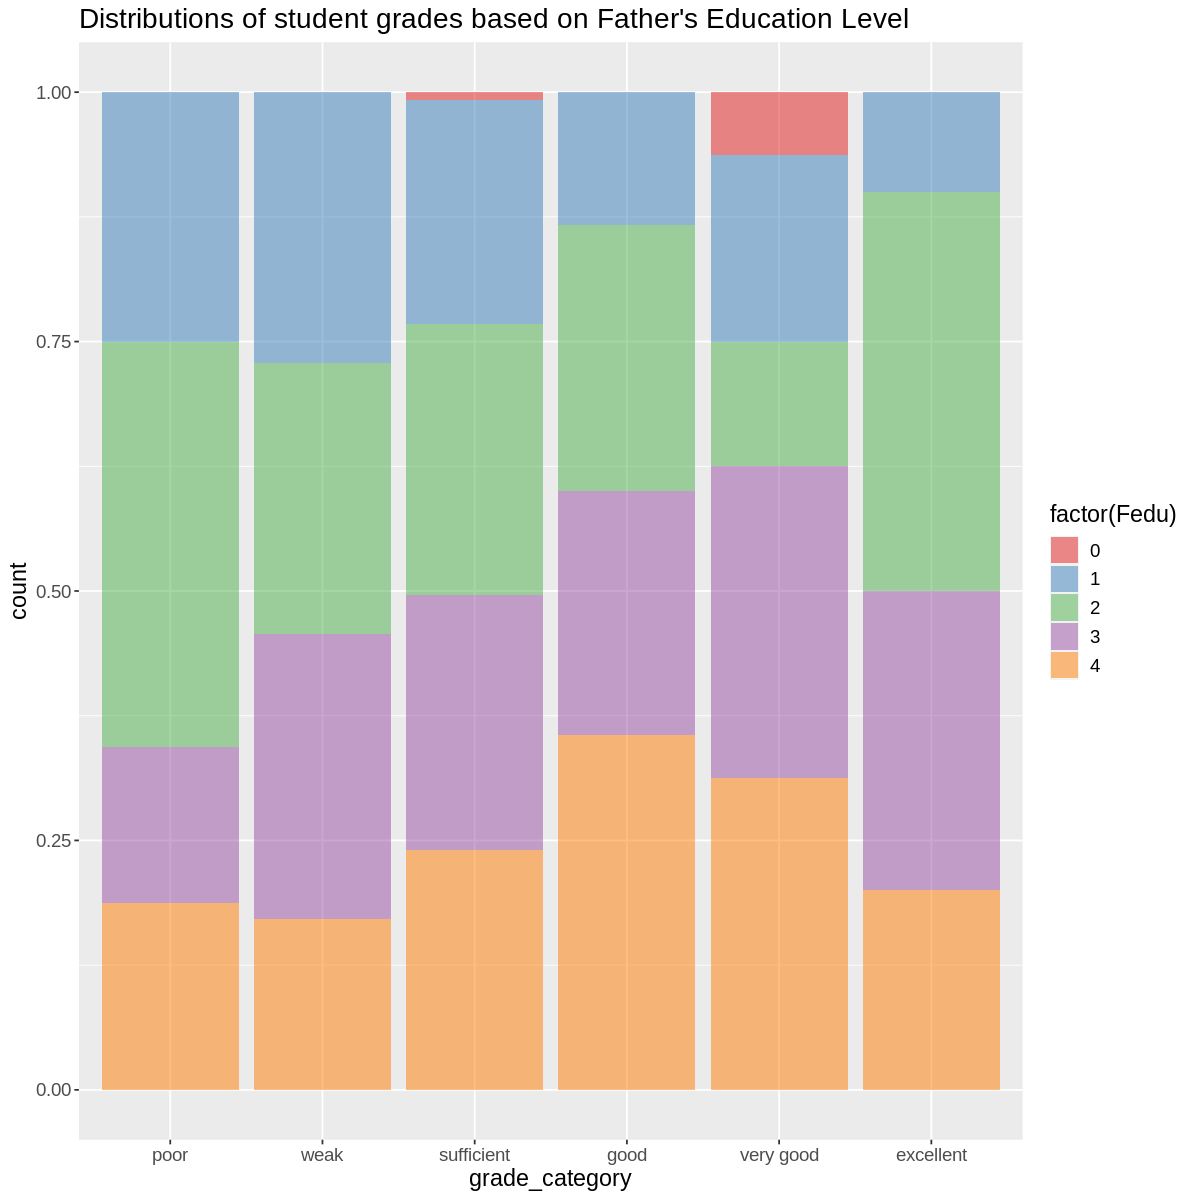

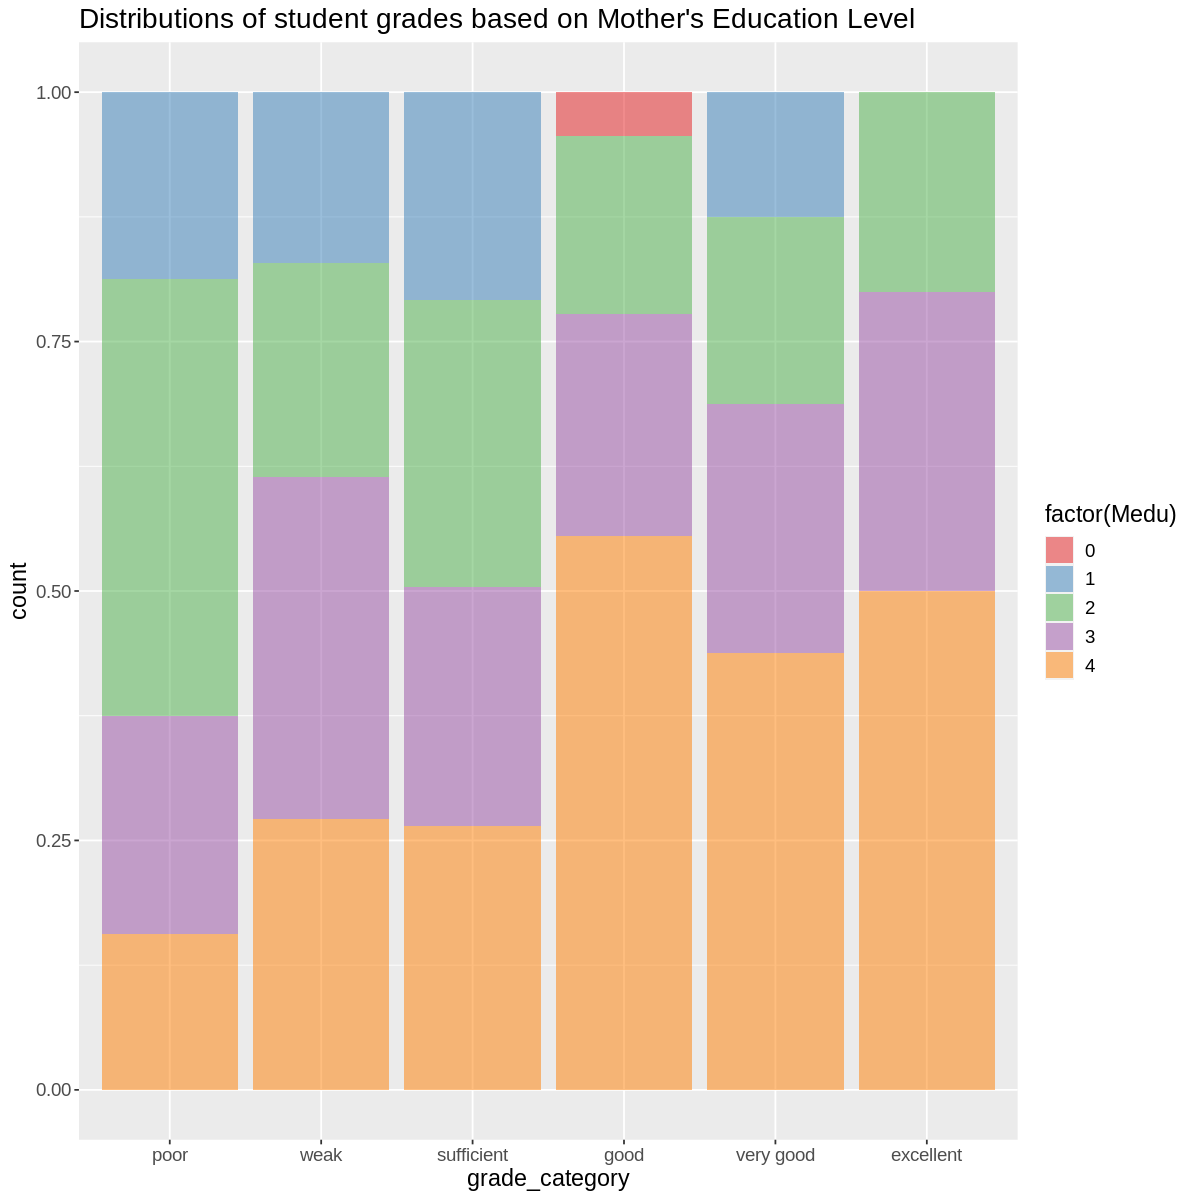

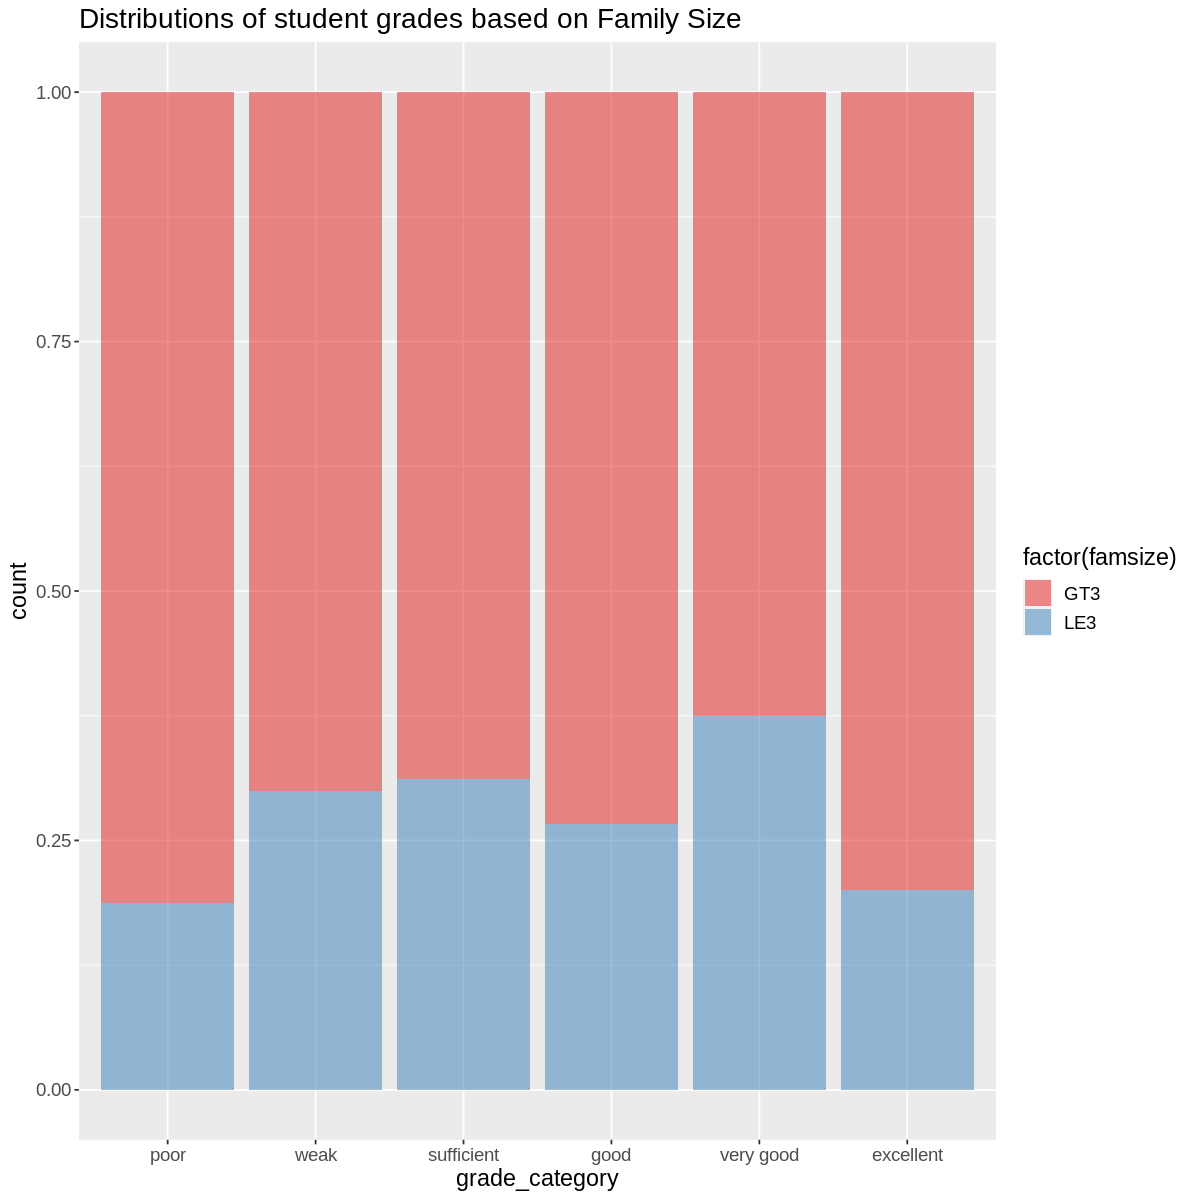

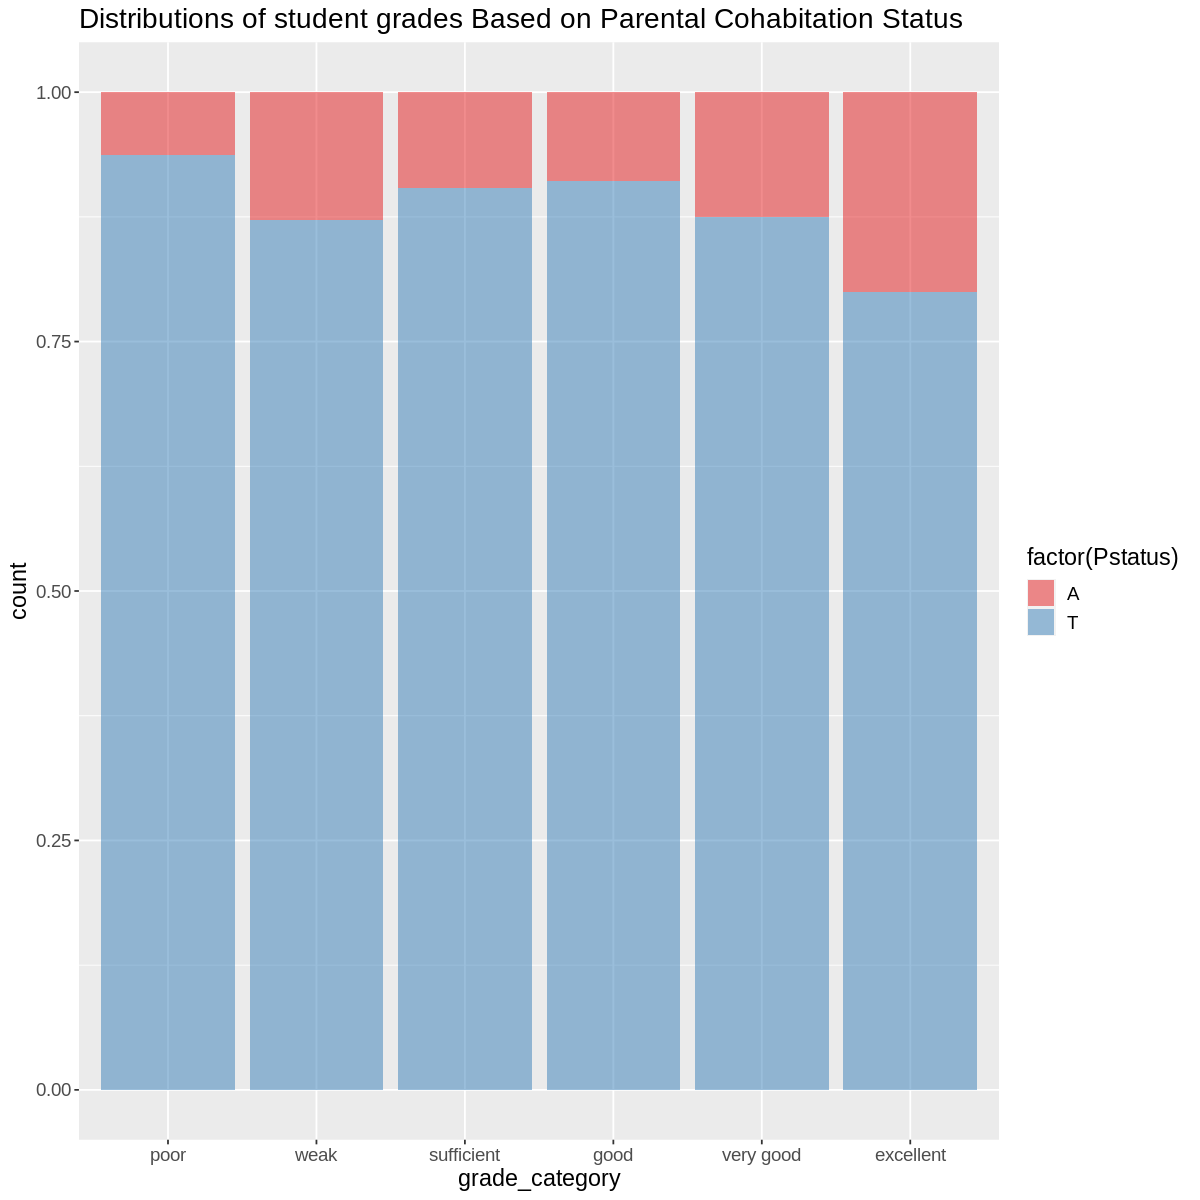

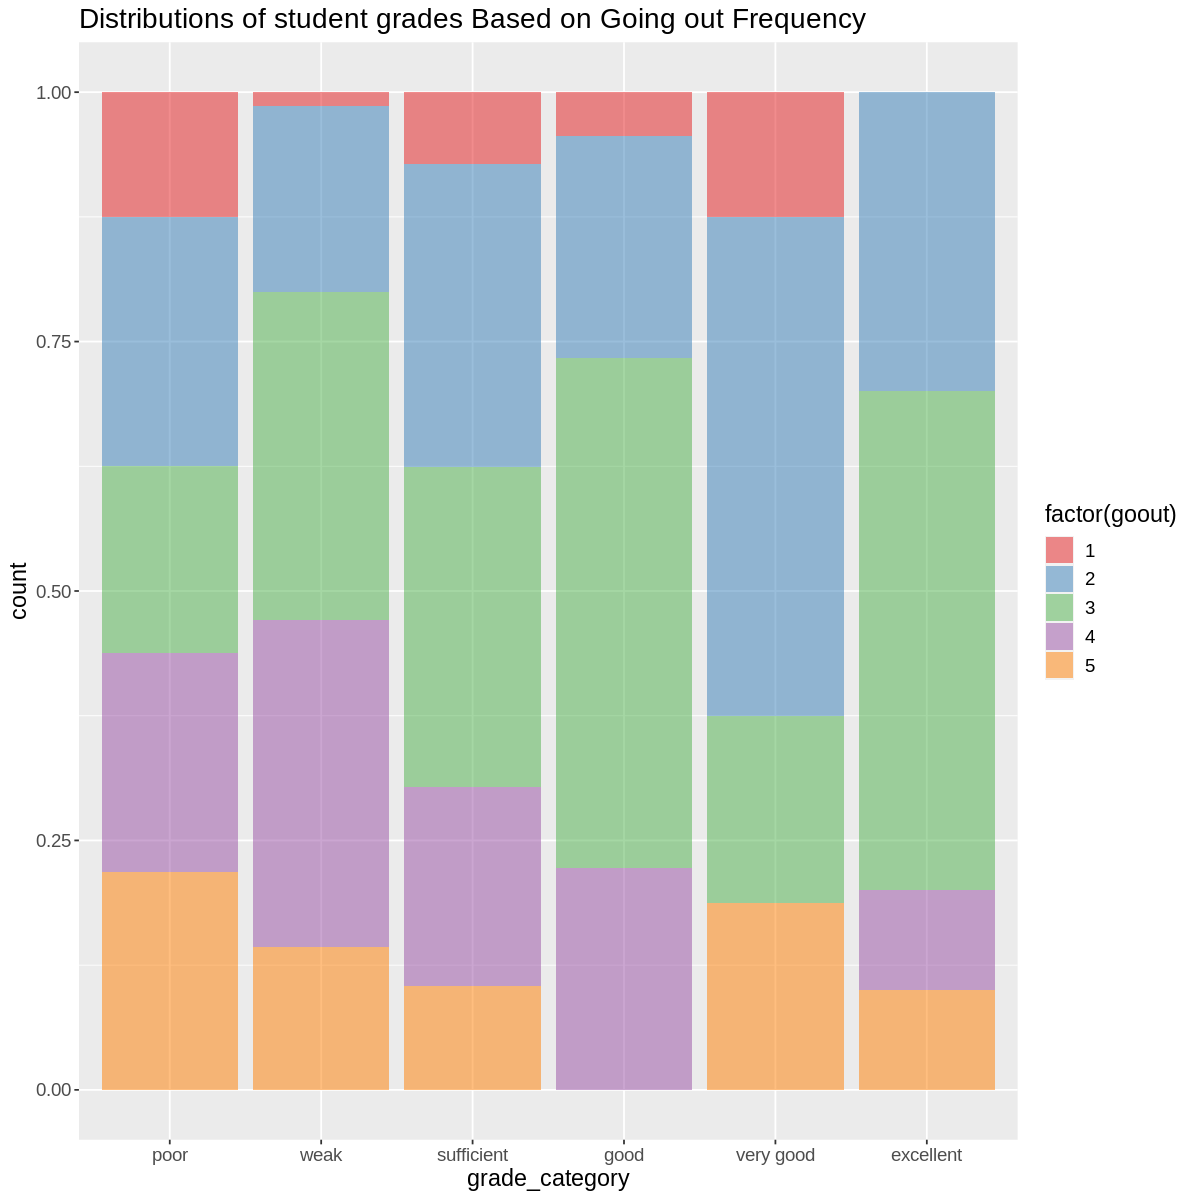

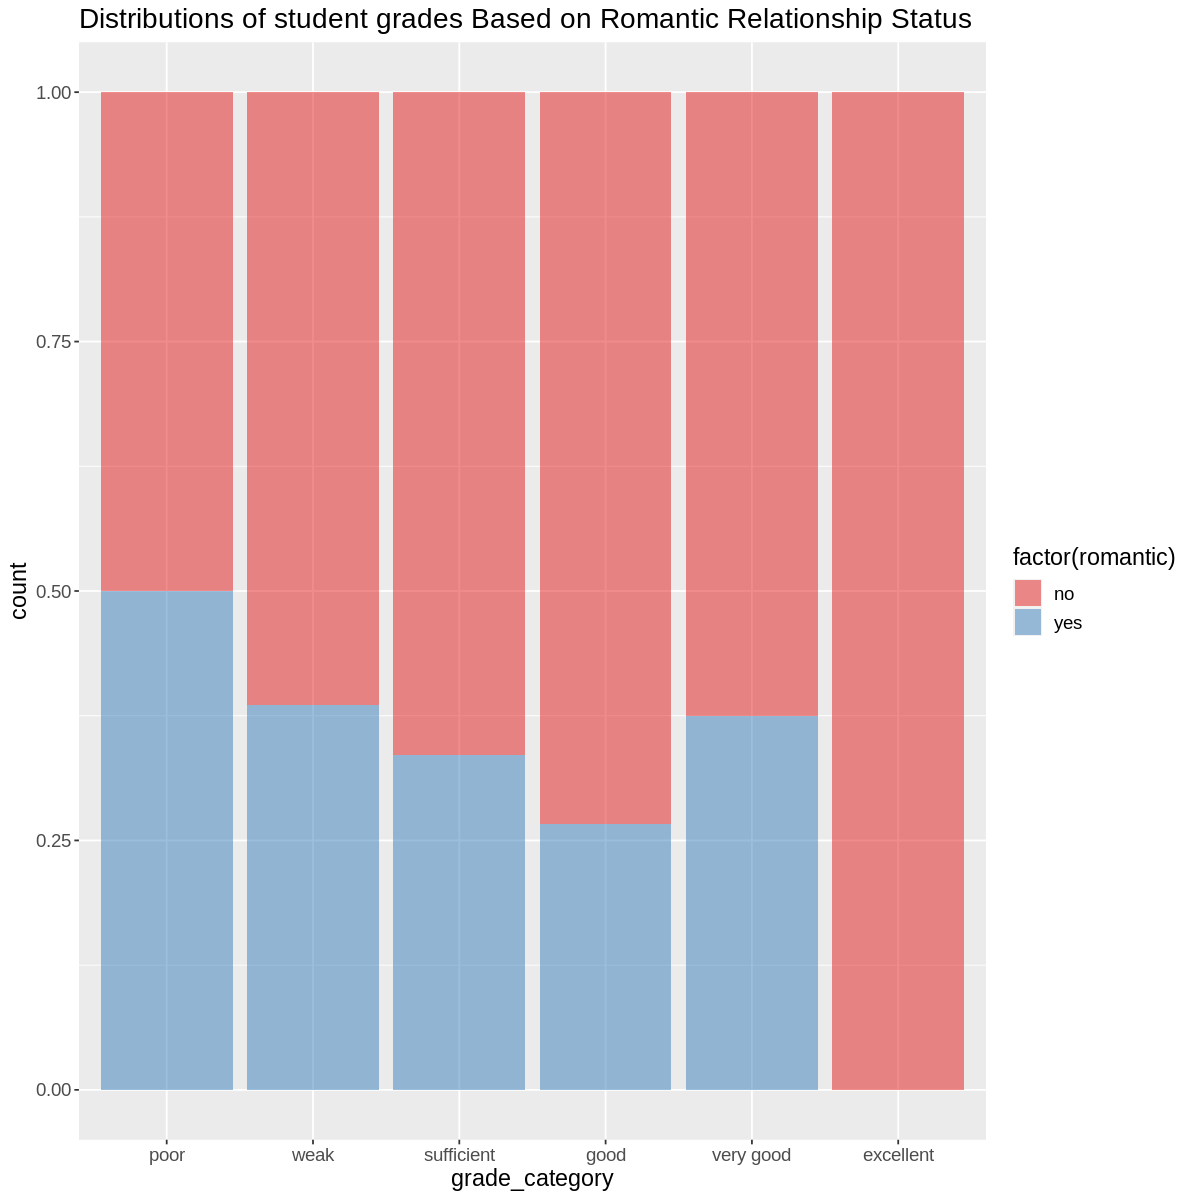

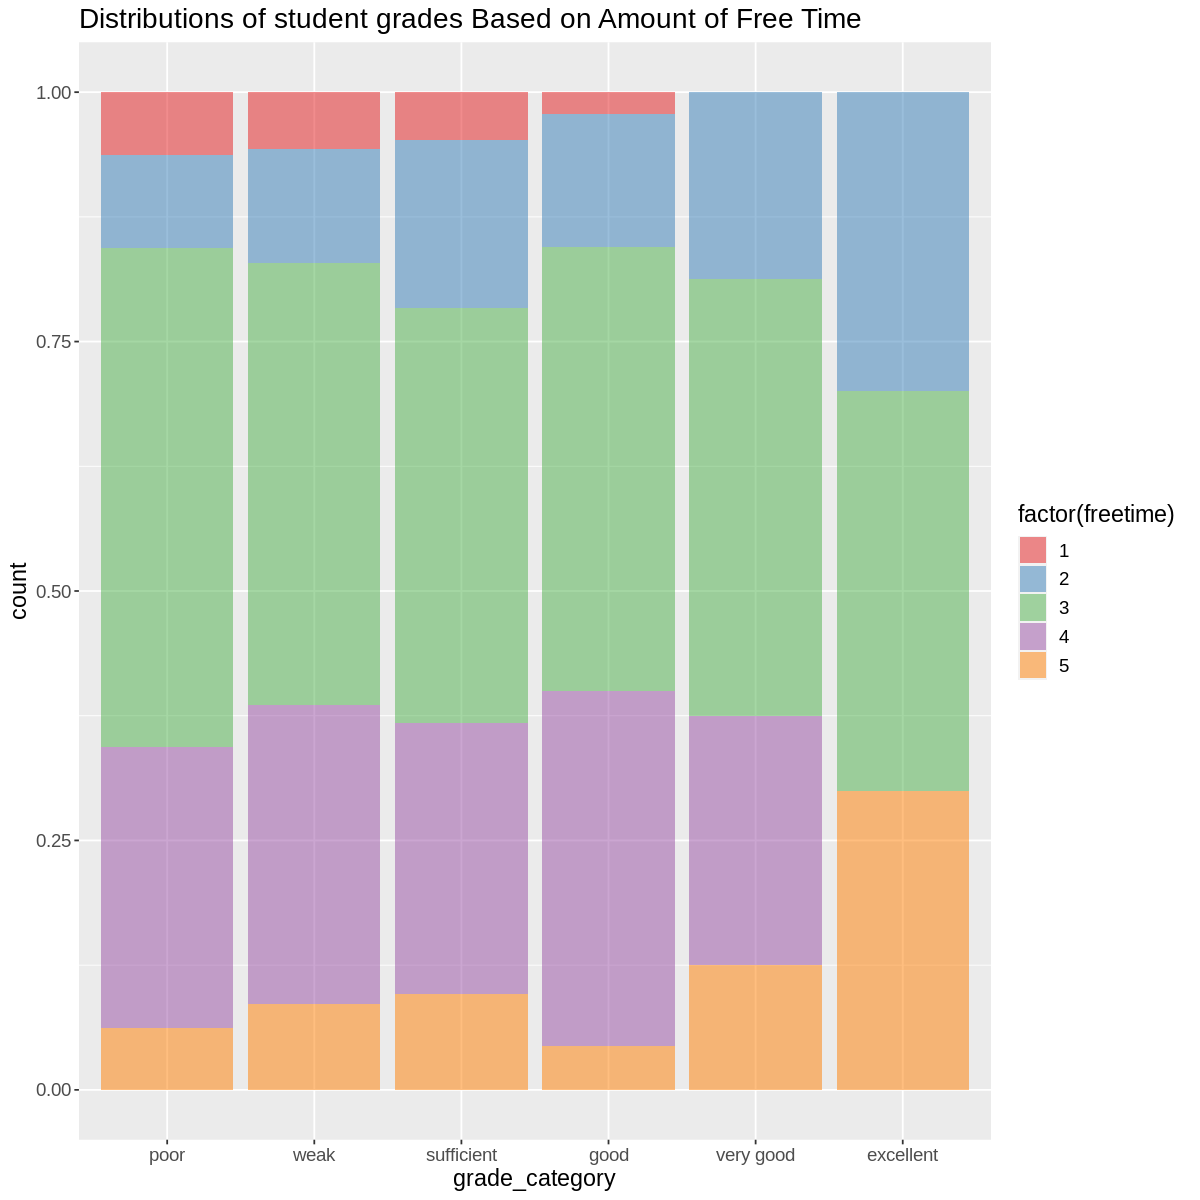

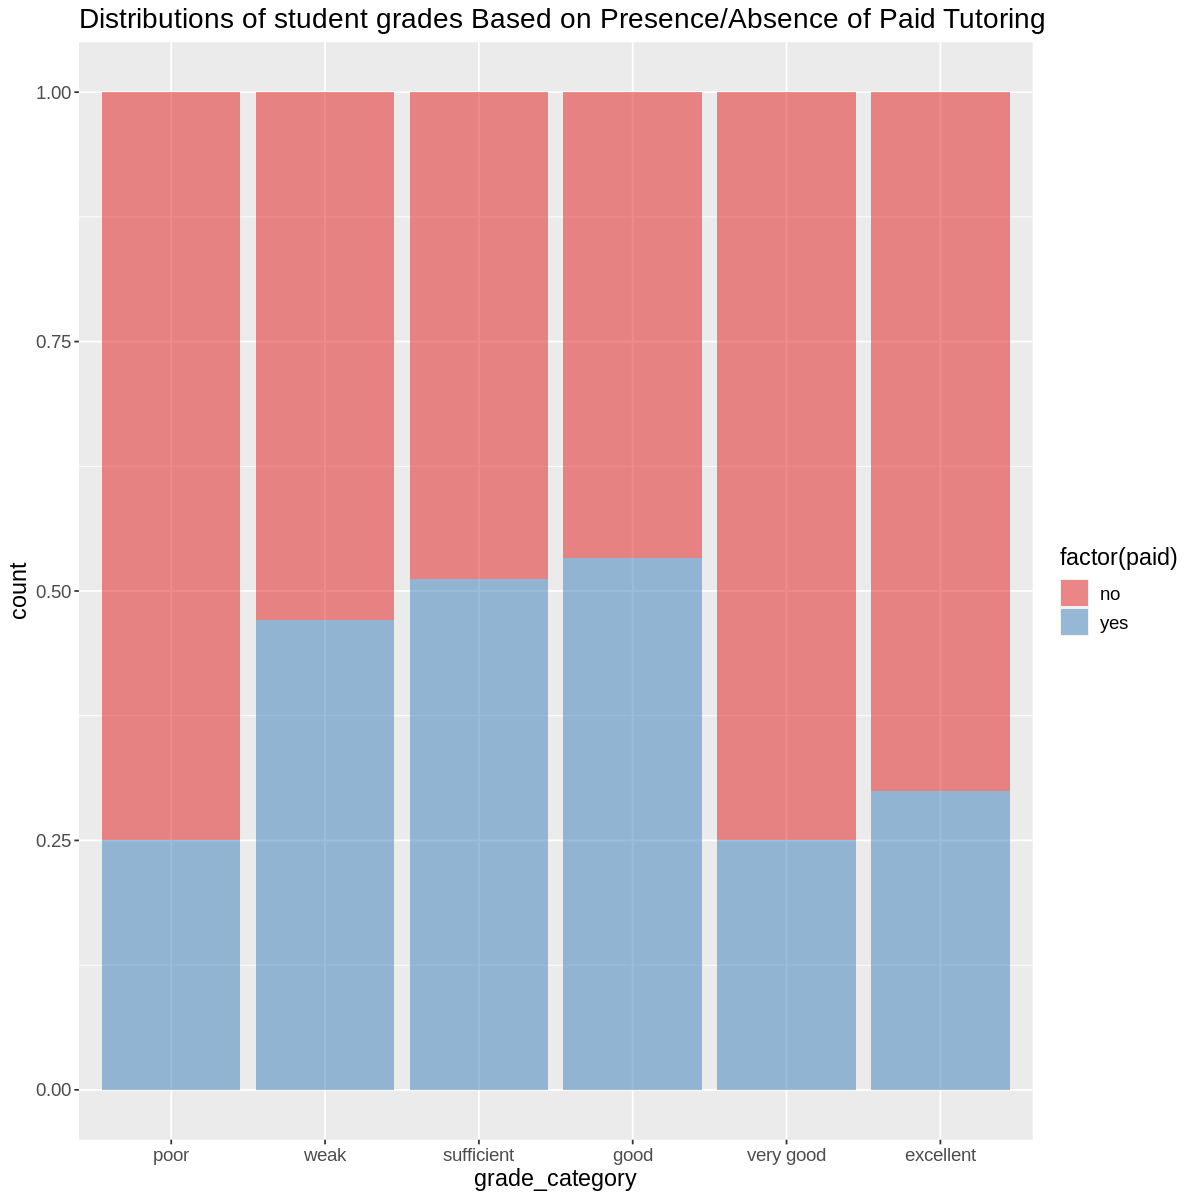

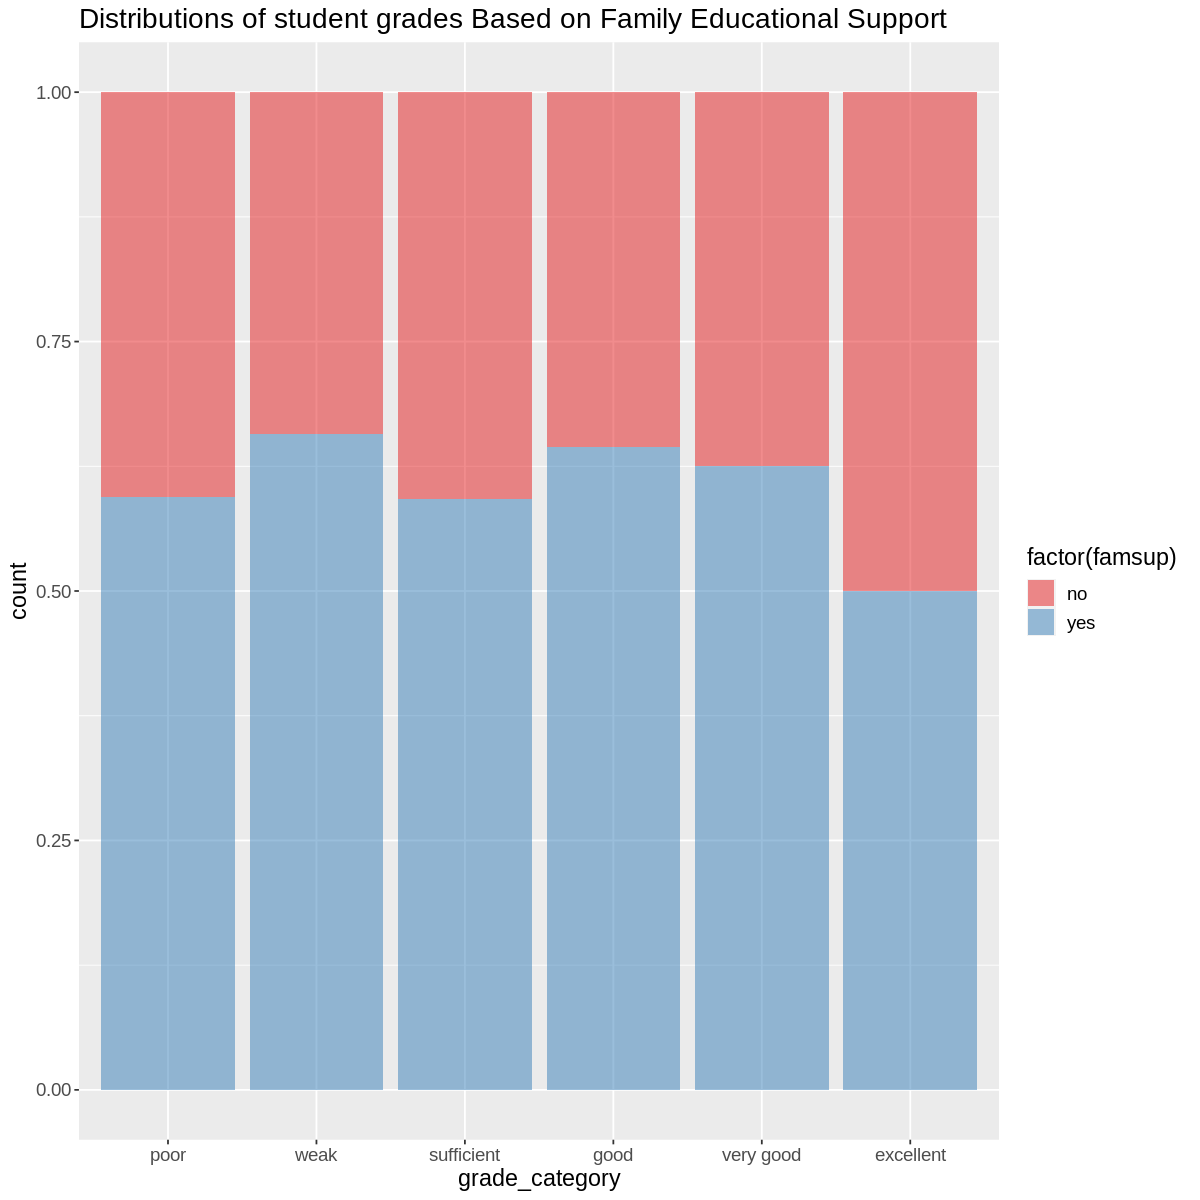

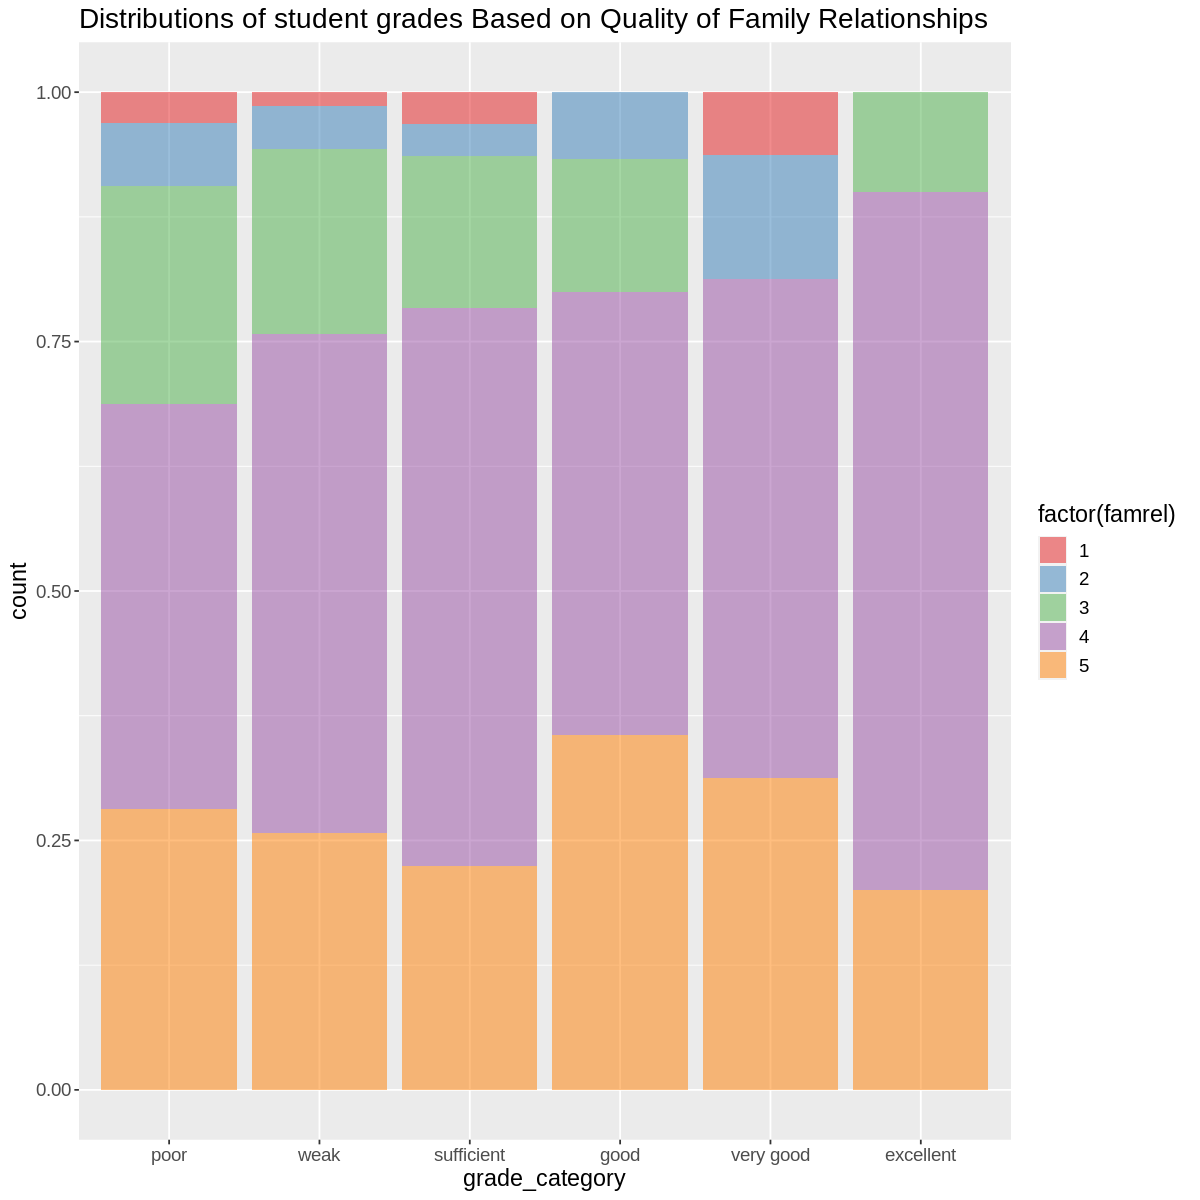

In [70]:
options(repr.plot.width = 10, repr.plot.height = 10)


# grade distributions based on father's education level (0 = none, 1 = up to 4th grade, 2 = 5-9th grade, 3 = secondary education, 4 = higher
# education)
edu_plot_father <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(Fedu))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) +
    ggtitle("Distributions of student grades based on Father's Education Level") +
    scale_fill_brewer(palette = 'Set1')
    

# grade distributions based on mother's education level
edu_plot_mother <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(Medu))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades based on Mother's Education Level") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
famsize_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(famsize))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades based on Family Size") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
pstatus_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(Pstatus))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Parental Cohabitation Status") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on frequency of going outwith friends (numeric: from 1 - very low to 5 - very high)
goout_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(goout))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Going out Frequency") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on presence/absence of a romantic relationship (binary: yes or no)
romantic_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(romantic))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Romantic Relationship Status") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on free time after school (numeric: from 1 - very low to 5 - very high)
freetime_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(freetime))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Amount of Free Time") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on extra paid classes within the course subject (binary: yes or no)
paid_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(paid))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Presence/Absence of Paid Tutoring") +
    scale_fill_brewer(palette = 'Set1')


# grade distributions based on family educational support (binary: yes or no)
famsup_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(famsup))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Family Educational Support") +
    scale_fill_brewer(palette = 'Set1')

# grade distributions based on quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
famrel_plot <- grades_train %>% 
    ggplot(aes(x = grade_category, fill = factor(famrel))) +
    geom_bar(position = "fill", alpha = 0.5) +
    theme(text = element_text(size = 14)) + 
    ggtitle("Distributions of student grades Based on Quality of Family Relationships") +
    scale_fill_brewer(palette = 'Set1')
# plot bar graphs for each predictor
edu_plot_father
edu_plot_mother
famsize_plot
pstatus_plot
goout_plot
romantic_plot
freetime_plot
paid_plot
famsup_plot
famrel_plot


Figures 2-11. Bar graphs showing the distribution of predictor variable categories in each grade category.

After observing each plot, we decided to use the following six predictors in our recipe: Fedu, Medu, goout, romantic, freetime, and famrel. We based our decisions
on the variability of the distributions of predictor categories across grade categories. For example, in the Romantic relationship status plot, no students in the
"excellent" category were in a romantic relationship. However, all other grade categories had some students who were in a relationship. We therefore viewed romantic
relationship status as a potentially good predictor because it seems to differentiate between excellent and non-excellent students.

On the other hand, in the Family size plot, it seems that there is no appreciable difference in predictor distribution across the grade categories. Therefore, we didn't include famsize as a predictor variable.

Having chosen our predictor and target variables, we can now begin our k nearest neighbors classification workflow. First, we select the columns from grades_train
that we are going to use in our analysis:

In [71]:
# predictors to include: Fedu, Medu, goout, romantic, freetime, and famrel; 

grades_train_predictors <- grades_train %>%
    mutate(grade_category = as_factor(grade_category)) %>%
    select(-famsize, -Pstatus, -paid, -famsup, -G3, -romantic)


Then, we perform upsampling to balance out all the grade categories, as alluded to previously.

In [72]:
# obtain dataframe for upsampled data
grades_train_predictors <- recipe(grade_category ~., data = grades_train_predictors) %>%
    step_upsample(grade_category, over_ratio = 1, skip = FALSE) %>%
    prep() %>%
    bake(new_data = grades_train_predictors)

As the final part of our data pre-processing, we need to decide whether to scale and center our predictor variables. Five of our six predictor variables (Medu, F
edu, goout, freetime, and famrel) are categorized into integers from 0 - 4, whereas one of our predictor variables (romantic) is categorized as either 0 (for not
in a relationship) or 1 (for currently in a relationship). Because not all our predictor variables are on the same scale, it would make sense to scale and center them. However, after scaling and centering our categorical variables, they lose their interprebility. Originally, our predictors could only take integer value. After 
scaling and centering, our predictors could take on decimal values. However, it is difficult to interpret a decimal value for a relationship status.

Because of the benefits and pitfalls of scaling and centering, we perform two separate analyses: with and without scaling/centering.

First, we perform the analysis using scaled predictors. 

In [73]:
# Workflow using scaled predictors
set.seed(1)

#create recipe, which scales and centers all predictors
grades_recipe_scaled <- recipe(grade_category ~., data = grades_train_predictors) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())


Next, we need to chooose how many folds we will use for cross-validation. We should choose a fold value that provides a good balance between a precision (low standard error) and a reasonable computational time. Based on this, we decide to use 5 folds for cross-validation. 

In [74]:

# use 5 folds for cross-validation
grades_vfold <- vfold_cv(grades_train_predictors, v = 5, strata = grade_category)

Next, we create our model specification:

In [75]:
# create model specification
grades_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

To see which k value would give us the most accurate grade estimate, we need to test out more than 1 value of k. To ensure we are testing out a 
good range of k values, we will test values from 1 to 120, going up by 10.

In [76]:
# make a tibble of values ranging from 1 to 120, going up by 10. This ensures we are testing a good range of k values.
k_lots <- tibble(neighbors = seq(from = 1, to = 120, by = 10))

Next, we will obtain the accuracy estimates for the values of k that we tested. To visualize the results, we will plot a graph of accuracy
estimates vs. k value.

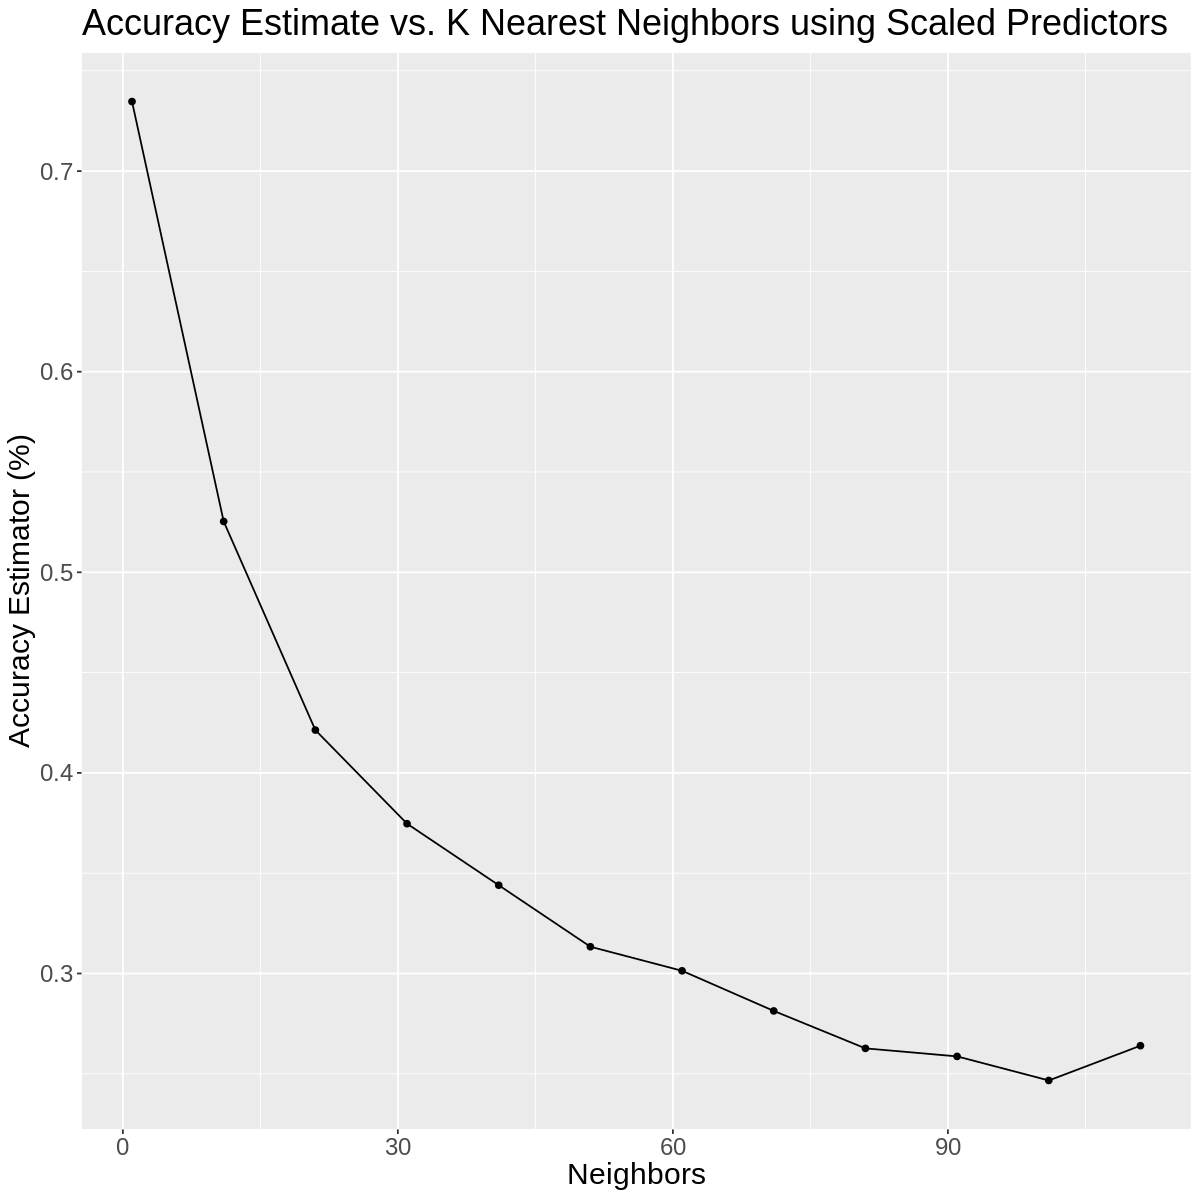

In [77]:
# obtain accuracy estimates for each of the k values we tested
grade_results <- workflow() %>%
  add_recipe(grades_recipe_scaled) %>%
  add_model(grades_knn_spec) %>%
  tune_grid(resamples = grades_vfold, grid = k_lots) %>% 
  collect_metrics()

# make plot of accuracy estimates vs. k nearest neighbors for visualization
grade_results_accuracies_plot <- grade_results %>%
    filter(.metric == "accuracy") %>%
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(x = "Neighbors", y = "Accuracy Estimator (%)") +
    ggtitle("Accuracy Estimate vs. K Nearest Neighbors using Scaled Predictors") +
    theme(text = element_text(size = 18))

# print out accuracy vs. k nearest neighbor plot
grade_results_accuracies_plot

Figure 12. Graph of Accuracy estimators vs. k nearest neighbors using scaled predictors.

From the accuracy vs. k nearest neighbors graph, it appears that accuracy decreases exponentially as k increases , with the peak accuracy accuracy estimate occuring when k = 1. The peak accuracy is at around 73%. Due to this trend in the graph, we will choose k = 1 for our final knn model.

In [78]:
# create final model specification using k = 1
grades_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) %>%
  set_engine("kknn") %>%
  set_mode("classification")


grades_fit <- workflow() %>%
  add_recipe(grades_recipe_scaled) %>%
  add_model(grades_spec_final) %>%
  fit(data = grades_train)


To see how our model perfoms on data that it has not encountered yet, we will test its prediction accuracy on our testing dataset,
grades_test. 

In [79]:
# obtain grade_category prediction accuracy using testing dataset
grades_test_predictions <- predict(grades_fit, grades_test) %>%
  bind_cols(grades_test) %>%
  metrics(truth = grade_category, estimate = .pred_class) %>%
  filter(.metric == "accuracy") %>%
  select(.metric, .estimate)
grades_test_predictions

.metric,.estimate
<chr>,<dbl>
accuracy,0.2680412


As we can see, the model's prediction accuracy on the testing data is around 27%. This accuracy result is much lower than the  
the accuracy obtained when performing cross-validation (around 73%). It is interesting to note that while an accuracy of 27% is quite low, it is better than a model which randomly assigns a grade category to an observation. Since there are 5 grade categories, random assignment would theoretically have a 1 in 5 or 20% accuracy. 

Next, we perform the same knn analysis without scaling the predictor variables in order to see if there is any difference in the final results.
The workflow for this analysis is almost identical to the one above, except there is no scaling/centering step.

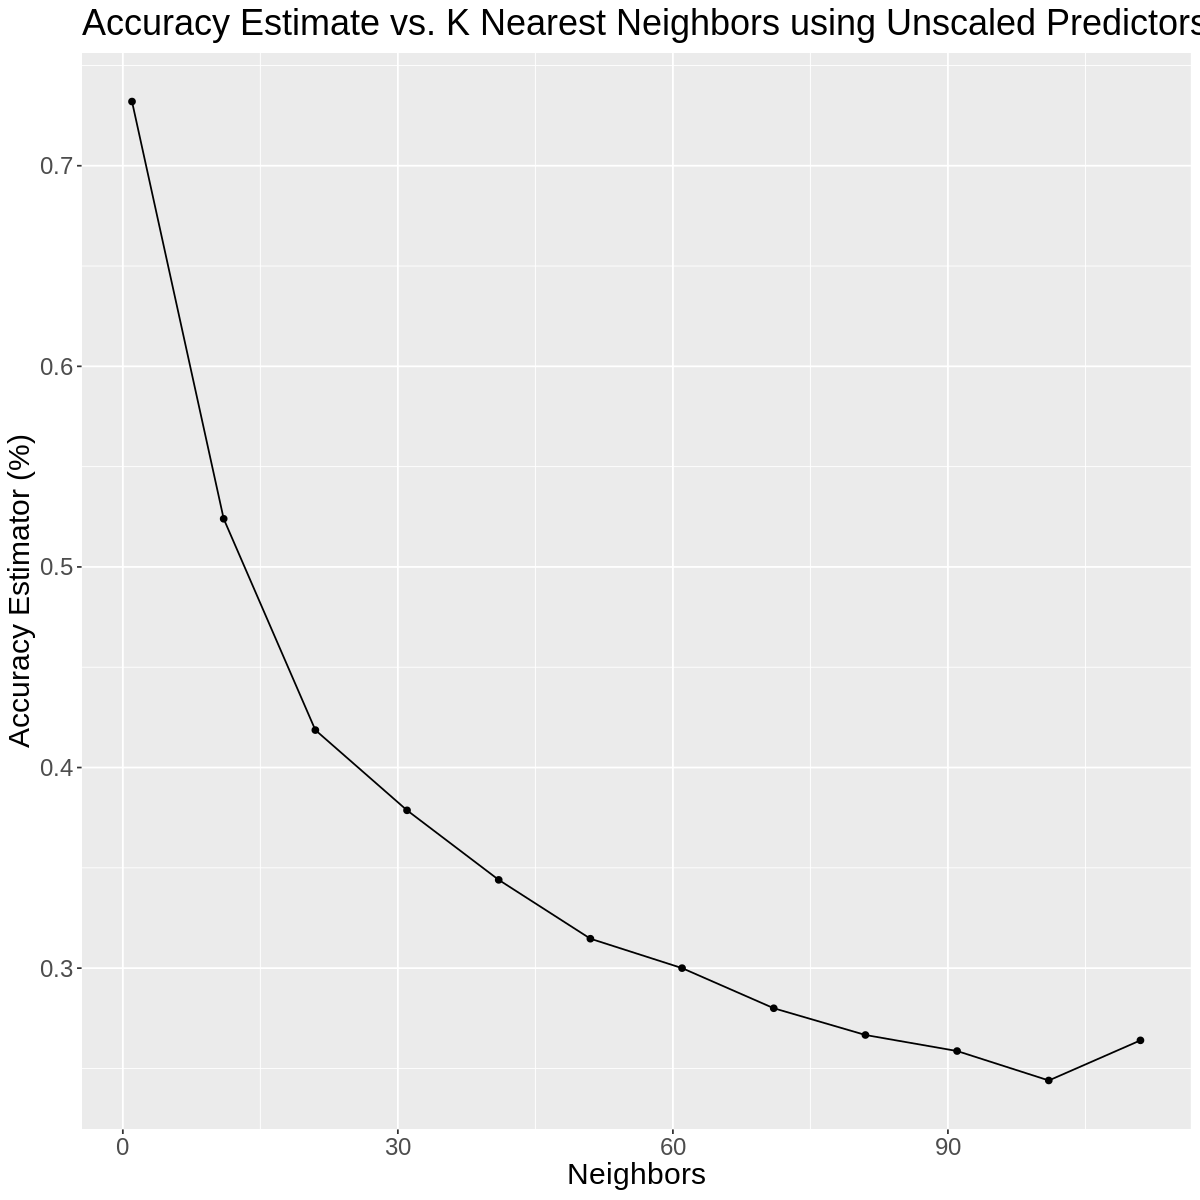

In [80]:
# Workflow using unscaled predictors

# create recipe
grades_recipe_unscaled <- recipe(grade_category ~., data = grades_train_predictors)

#obtain accuracy estimates based on different values of k
grade_results_unscaled <- workflow() %>%
  add_recipe(grades_recipe_unscaled) %>%
  add_model(grades_knn_spec) %>%
  tune_grid(resamples = grades_vfold, grid = k_lots) %>% 
  collect_metrics()

# create plot of accuracy estimate vs. k nearest neighbors for unscaled data
grade_results_accuracies_plot_unscaled <- grade_results_unscaled %>%
    filter(.metric == "accuracy") %>%
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(x = "Neighbors", y = "Accuracy Estimator (%)") +
    ggtitle("Accuracy Estimate vs. K Nearest Neighbors using Unscaled Predictors") +
    theme(text = element_text(size = 18))

# print out plot
grade_results_accuracies_plot_unscaled

Figure 12. Graph of Accuracy estimators vs. k nearest neighbors using scaled predictors.

Similar to our analysis using scaled predictors, the graph shows that k = 1 produces the most accurate results.

In [81]:
# create final model specification using k = 1 neighbor
grades_spec_final_unscaled <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) %>%
  set_engine("kknn") %>%
  set_mode("classification")

grades_fit_unscaled <- workflow() %>%
  add_recipe(grades_recipe_scaled) %>%
  add_model(grades_spec_final) %>%
  fit(data = grades_train_predictors)

# obtain grade_category prediction accuracy using testing dataset
grades_test_predictions_unscaled <- predict(grades_fit_unscaled, grades_test) %>%
  bind_cols(grades_test) %>%
  metrics(truth = grade_category, estimate = .pred_class)
grades_test_predictions

.metric,.estimate
<chr>,<dbl>
accuracy,0.2680412


Similar to our model accuracy obtained using scaled predictors, our accuracy using unscaled predictors is also 27%

**Discussion**

As students, we thought that conducting data analysis on how multiple factors could influence academic performance would be relevant to us, as we could then theoretically apply that knowledge to our everyday lives. Although the sample is from high school students in Portugal, our findings should still serve as a good reference for university students at UBC. For example, if we discovered that the amount of free time one spent had a strong correlation towards how strong a student's academic performance was, we could then apply that knowledge accordingly. 

We attempted to use K-NN Classification to help predict future performance. One very important thing to note however, is that due to the scope of this course and the variable we were trying to find (student grades), K-NN Classification was not the best suited as student grades is a ordinal variable (variable that is used to describe an arrangement of objects in order), and not a class variable (i.e. Apples and oranges). 

Of the two datasets (Language and Math), we decided to focus on the latter, and conducted a preliminary analysis on which variables to use. We ended up choosing five out of the 30 variables based on if they had any distinct differences between each grade through a stacked bar plot: Fedu (Father's Education), Medu, (Mother's Education), goout (going out with friends), romantic (romantic relationship status), freetime (free time after school), and famrel (family relationship). We conducted two models, one with scaling and one without.  For both models, our best k was = 1, found by calculating the accuracy and plotting it on a line plot with accuracy as our y-axis and k as our x-axis with an accuracy of around 73%. 

From research conducted, we were expecting that the predictors we chose would have had a significant impact on student performance. Three of our predictors related to the socioeconomic background of the student's family where statistics have shown that income and wealth are shown to be related to our desired variables. For our other three predictors, they related to the environment outside of academic life. We believed that out of the 30 variables available from the dataset, these six predictors had the strongest relationship with academic performance.  

However, once we ran the model through the testing dataset, we were disappointed to find that the accuracy is only around 27%. This is  due to the K that we chose to use in our model. With a K of 1,  the model is just matching each new observation to its closest neighbour by overfitting. The model would be more complex, with the boundaries between each variable being very jagged. Additionally, if we were to create a new training set, the predictions would be completely different. Therefore, if we were to use this model on our testing set, it would be highly unlikely to get an accurate prediction. For both scaled and unscaled models, they both returned the exact same accuracy of 27% (0.268). This is due to the fact that five out of our 6 predictors were already on the same scale (from 0 -4), while our last predictor was on a scale of 0-1. Since scaling is when all the variables in the dataset is mutated to have a mean of 0 and a standard deviation of 0, there would not have been any changes to the data overall. 

Our findings would have had a great impact on identifying the factors that greatly contribute to or negatively affect a student's academic performance. Since the intention of our whole project was to identify the impact an individual’s social life and life outside of school has on their grades, we could have potentially identified the extent to which various social and financial factors affected their grades. While we were expecting there to be a stronger relationship between a student’s grades and the six factors we chose based on intuition, the results from our data and model contradicted our initial thoughts , thus making it difficult to claim a strong correlation between a student’s grades and any of the factors we had chosen based on our analysis.

The low accuracy of our model and the unpredictability of our model could be an indication of a low correlation between the factors we had chosen and a student's academic performance. However, this can also then suggest that there are other factors that play a more significant role in determining a student's grades which can be better suited to answering our question - what factors significantly affect a student’s grades? This can send us back to square one in determining our choice of factors - perhaps there were other social factors that would be better suited? Or perhaps the impact social factors have cannot be expressed for sure with the provided data? There are many things to consider in our data analysis and the reasons behind why we got the results we did - everything ranging from the size of the data, to the distribution of our variables among the categories that the grades can be broken down into. 

Some possible ideas to take away from our analysis would be to analyze different social factors that we had not used, such as : travel time, involvement in extracurricular activities , health status, or alcohol consumption. Or factors that are, intuitively, more directly related to one's academic performance - internet access, absences, failures, or study time. Another observation we had made was that the size of our data was a little constricting in the sense that there was an insufficient amount of observations to work with  

Ultimately, although our analysis did not return the results we had expected, it pushes us to look for different potential factors and/or data on the subject that could perhaps lead to more definitive results. 



**References**

1. Bertolini, K., Stremmel, A., & Thorngren, J. (2012). Student Achievement Factors. South Dakota State University College of Education and Human Sciences Department of Teaching, Learning and Leadership, 1-5. Retrieved from https://files.eric.ed.gov/fulltext/ED568687.pdf.

2. Gary N. Marks , John Cresswell & John Ainley (2006) Explaining socioeconomic inequalities in student achievement: The role of home and school factors, Educational Research and Evaluation, 12:02, 105-128, DOI: 10.1080/13803610600587040. Retrieved from https://doi.org/10.1080/13803610600587040. 

3. P. Cortez and A. Silva (2008) Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008), 5-12, Porto, Portugal, EUROSIS, ISBN 978-9077381-39-7
